In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
#import scvelo as scv
import anndata as ad
import omicverse as ov
import pcurvepy2

In [6]:
import matplotlib as plt
print(plt.__version__)

3.10.3


In [7]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=True)
vector(False)

# Figure4F

Begin robust gene identification
After filtration, 30647/30654 genes are kept.     Among 30647 genes, 29896 genes are robust.
End of robust gene identification.
Begin size normalization: pearson and HVGs selection pearson
Time to analyze data in cpu: 102.8859760761261 seconds.
End of size normalization: pearson and HVGs selection pearson


2025-09-29 20:54:24,143 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-09-29 20:54:25,330 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-09-29 20:54:25,391 - harmonypy - INFO - Iteration 1 of 10
2025-09-29 20:54:28,198 - harmonypy - INFO - Iteration 2 of 10
2025-09-29 20:54:31,407 - harmonypy - INFO - Converged after 2 iterations


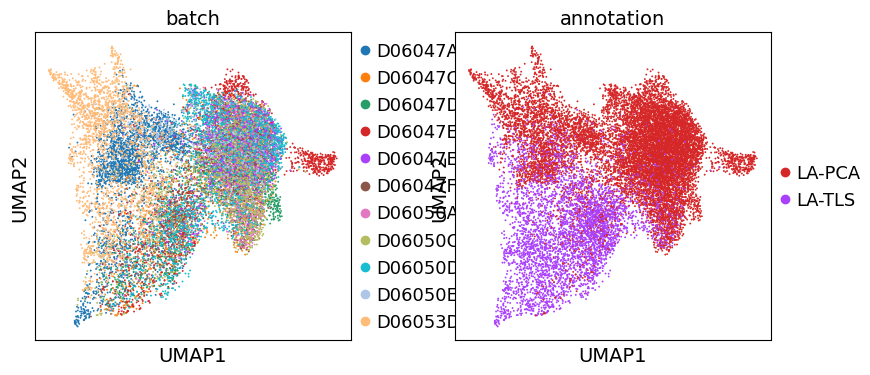

In [4]:
LA_bin50=sc.read_h5ad('/data1/fengyu/methods/trajectory/LA_for_trajectory.h5ad')
LA_bin50=ov.pp.preprocess(LA_bin50,mode='pearson|pearson',n_HVGs=3000,)
#LA_bin50=ov.pp.preprocess(LA_bin50,mode='shiftlog|pearson',n_HVGs=3000,)
LA_bin50.raw = LA_bin50
LA_bin50 = LA_bin50[:, LA_bin50.var.highly_variable_features]
ov.pp.scale(LA_bin50)
ov.pp.pca(LA_bin50,layer='scaled',n_pcs=50)
#LA_bin50.obsm["X_mde_pca"] = ov.utils.mde(LA_bin50.obsm["scaled|original|X_pca"])
sc.external.pp.harmony_integrate(LA_bin50,'batch')
LA_bin50.obsm['X_pca']=LA_bin50.obsm['X_pca_harmony']
sc.pp.neighbors(LA_bin50, n_neighbors=10, n_pcs=40)
sc.tl.umap(LA_bin50)
sc.pl.umap(LA_bin50, color=["batch", "annotation"])
sc.pp.neighbors(LA_bin50, n_neighbors=15, n_pcs=50,
               use_rep='X_pca')
ov.utils.cluster(LA_bin50,method='leiden',resolution=1)

In [ ]:
sns.scatterplot(data=df[df['JCHAIN']!=0],x='x',y='y',color='#FA7F72',edgecolor='none',s=0.4)
sns.scatterplot(data=df[df['CD3E']!=0],x='x',y='y',color='#81B1D2',edgecolor='none',s=4)
sns.scatterplot(data=df[df['MS4A1']!=0],x='x',y='y',color='#BC82BD',edgecolor='none',s=4)

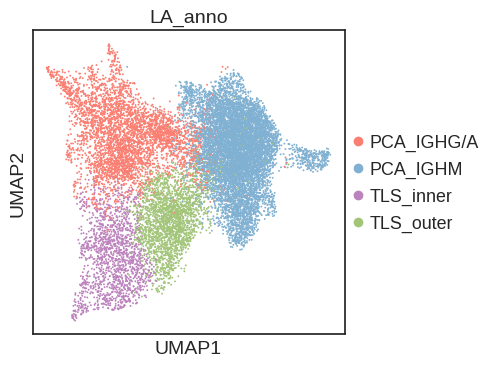

In [18]:
plt.style.use('seaborn-v0_8-white')
#plt.style.use('dark_background')
LA_bin50.obs['LA_anno']='PCA_IGHM'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['3','5','6']),'LA_anno']='PCA_IGHG/A'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['2']),'LA_anno']='TLS_outer'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['4']),'LA_anno']='TLS_inner'
sc.pl.umap(LA_bin50,color=['LA_anno'],palette=['#FA7F72','#81B1D2','#BC82BD','#a2c57a'],save='fig4f1.png')

In [ ]:
sc.pl.umap(LA_bin50,color=['LA_anno'],palette=['#A830D8','#EA34C4','#66DDFC','#72F54A'],save='fig4f1.png')

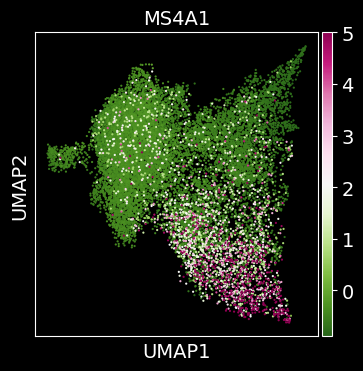

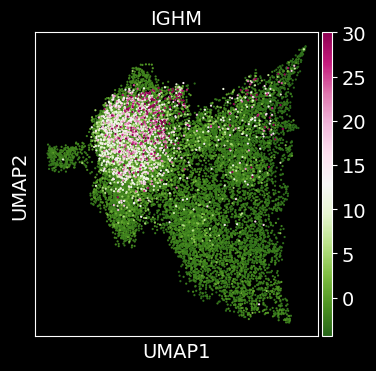

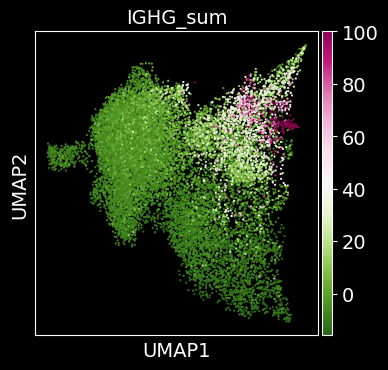

In [6]:
cmap='PiYG_r'
sc.pl.umap(LA_bin50,color=['MS4A1'],use_raw=False,cmap=cmap,vmax=5,s=10,save='fig4f2.png')
sc.pl.umap(LA_bin50,color=['IGHM'],use_raw=False,cmap=cmap,vmax=30,s=10,save='fig4f3.png')
LA_bin50.obs['IGHG_sum'] = np.sum([LA_bin50[:, gene].X for gene in ['IGHG1', 'IGHG2', 'IGHG3', 'IGHG4']], axis=0)
sc.pl.umap(LA_bin50, color='IGHG_sum', use_raw=False, cmap=cmap, vmax=100, s=10, save='fig4f4.png')

# Figure4G

In [7]:
import scanpy as sc

# 读取数据
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

In [8]:
meta=pd.read_csv('/data1/fengyu/methods/fig5/LA_bin50_meta.csv',index_col=0)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].map(str)+'_'+adata.obs['bin50_y'].map(str)
adata.obs=adata.obs.merge(meta[['loc','LA_anno']],on='loc',how='left')

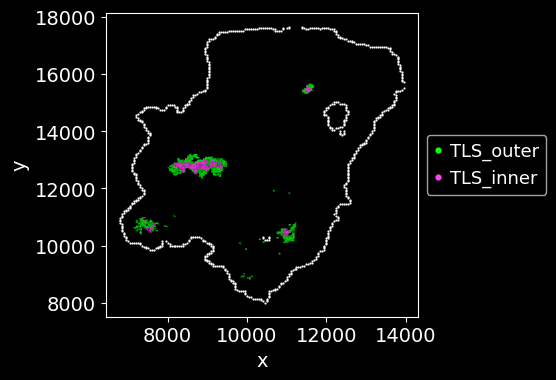

In [9]:
#plt.style.use('seaborn-v0_8-white')
plt.style.use('dark_background')
plt.figure(figsize=(4, 4))
#for m,i in zip([adata1,adata2, adata3,adata4,adata5,adata6,adata7,adata9],['D06047A2','D06047D4','D06047E1','D06047E2','D06047F6','D06050C2','D06050D4','D06053D2']):
m=adata4
i='D06047E1'
tissue_outline=pd.DataFrame(m.uns['tissue_outline'],columns=['x','y'])
sns.scatterplot(data=tissue_outline,x='x',y='y',color='white',s=2)
sns.scatterplot(data=adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))].obs,x='x',y='y',hue='LA_anno',edgecolor=None,palette=['#05FF11','#FF42F0'],s=0.2)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=10)
plt.grid(False)
plt.savefig('./fig4g_upper.png',dpi=600, bbox_inches='tight')

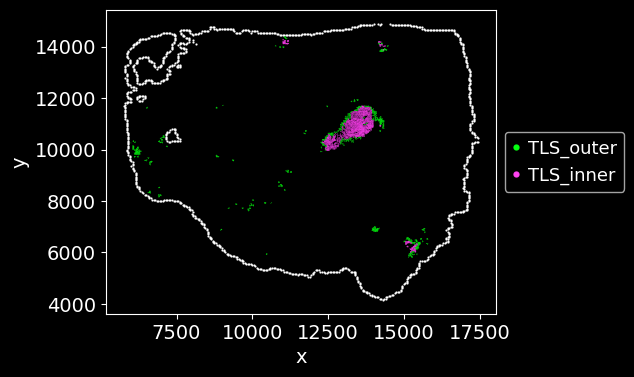

In [10]:
#plt.style.use('seaborn-v0_8-white')
plt.style.use('dark_background')
plt.figure(figsize=(5, 4))
#for m,i in zip([adata1,adata2, adata3,adata4,adata5,adata6,adata7,adata9],['D06047A2','D06047D4','D06047E1','D06047E2','D06047F6','D06050C2','D06050D4','D06053D2']):
m=adata1
i='D06047A2'
tissue_outline=pd.DataFrame(m.uns['tissue_outline'],columns=['x','y'])
sns.scatterplot(data=tissue_outline,x='x',y='y',color='white',s=2)
sns.scatterplot(data=adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))].obs,x='x',y='y',hue='LA_anno',edgecolor=None,palette=['#05FF11','#FF42F0'],s=0.2)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=10)
plt.grid(False)
plt.savefig('./fig4g_lower.png',dpi=600, bbox_inches='tight')

# Figure4H

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
LA=adata[adata.obs['LA_anno'].notna()]

In [12]:
adata.obs.index=adata.obs.index.astype(str)

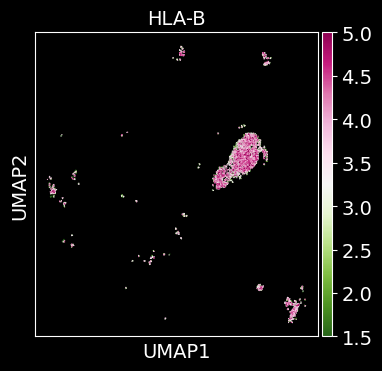

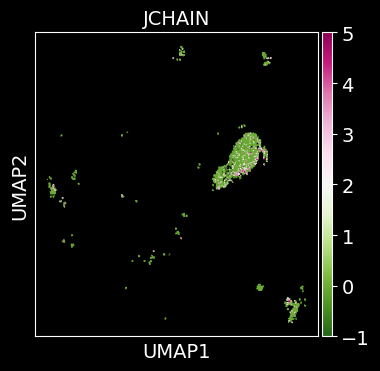

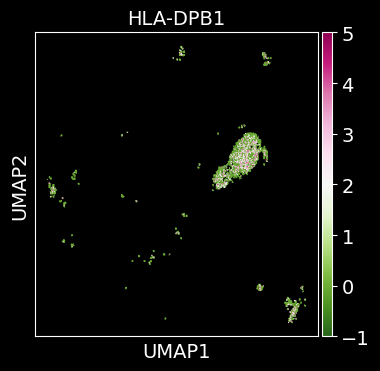

In [13]:
plt.style.use('dark_background')
i='D06047A2'
sc.pl.umap(adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))],color=['HLA-B'],cmap='PiYG_r',vmin=1.5,vmax=5,s=3,use_raw=False,save='fig4h1.png')
sc.pl.umap(adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))],color=['JCHAIN'],cmap='PiYG_r',vmin=-1,vmax=5,s=3,use_raw=False,save='fig4h2.png')
sc.pl.umap(adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))],color=['HLA-DPB1'],cmap='PiYG_r',vmin=-1,vmax=5,s=3,use_raw=False,save='fig4h3.png')

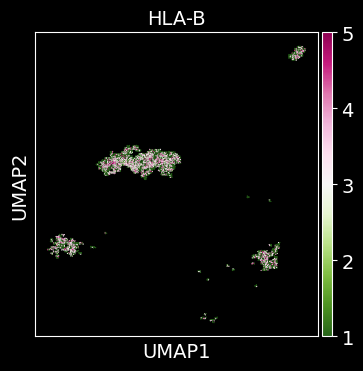

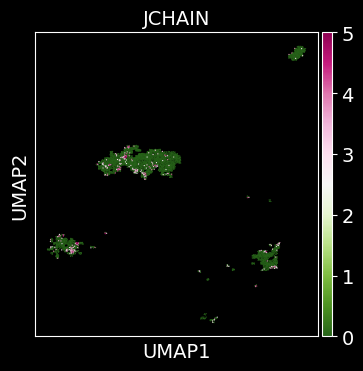

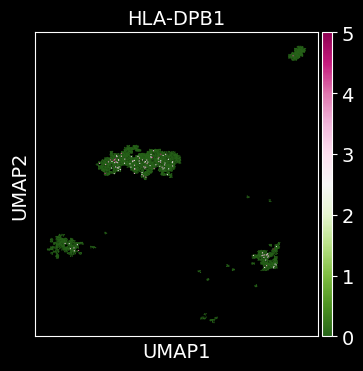

In [14]:
plt.style.use('dark_background')
i='D06047E1'
sc.pl.umap(adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))],color=['HLA-B'],cmap='PiYG_r',vmin=1,vmax=5,s=3,use_raw=False,save='fig4h4.png')
sc.pl.umap(adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))],color=['JCHAIN'],cmap='PiYG_r',vmin=0,vmax=5,s=3,use_raw=False,save='fig4h5.png')
sc.pl.umap(adata[(adata.obs['batch']==i)&(adata.obs['LA_anno'].isin(['TLS_inner','TLS_outer']))],color=['HLA-DPB1'],cmap='PiYG_r',vmin=0,vmax=5,s=3,use_raw=False,save='fig4h6.png')

# Figure4I

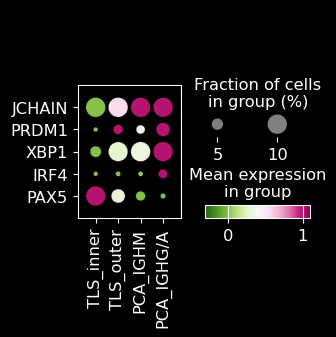

In [15]:
sc.pl.dotplot(adata[(adata.obs['anno'].isin(['plasma_cell','b_cell']))&(adata.obs['bin50 structural annotation'].isin(['LA-TLS','LA-PCA']))],
                     ['JCHAIN','PRDM1','XBP1','IRF4','PAX5'],dot_max=0.1,cmap='PiYG_r',standard_scale='var',vmax=1.1,vmin=-0.3,
                  groupby='LA_anno',swap_axes=True,use_raw=False,categories_order=['TLS_inner','TLS_outer','PCA_IGHM','PCA_IGHG/A'],
             save='fig4I.pdf')

# Figure4J/K

Begin robust gene identification
After filtration, 30647/30654 genes are kept.     Among 30647 genes, 29896 genes are robust.
End of robust gene identification.
Begin size normalization: pearson and HVGs selection pearson
Time to analyze data in cpu: 111.46571779251099 seconds.
End of size normalization: pearson and HVGs selection pearson


2025-08-19 10:42:56,068 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-08-19 10:42:57,486 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-08-19 10:42:57,546 - harmonypy - INFO - Iteration 1 of 10
2025-08-19 10:43:00,340 - harmonypy - INFO - Iteration 2 of 10
2025-08-19 10:43:02,893 - harmonypy - INFO - Converged after 2 iterations


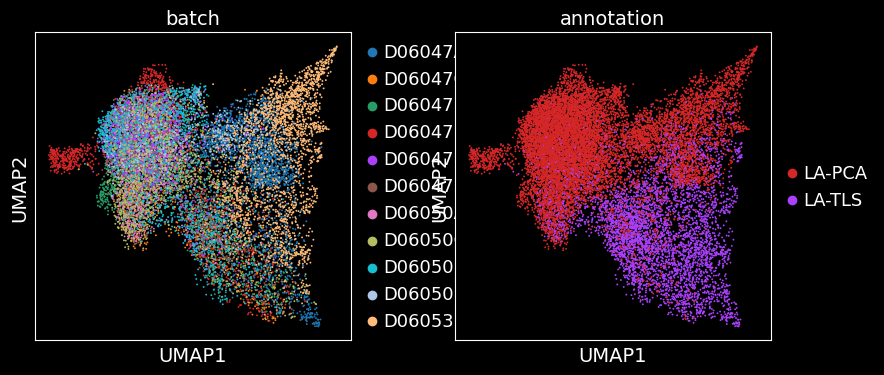

In [17]:
LA_bin50=sc.read_h5ad('/data1/fengyu/methods/trajectory/LA_for_trajectory.h5ad')
LA_bin50=ov.pp.preprocess(LA_bin50,mode='pearson|pearson',n_HVGs=3000,)
#LA_bin50=ov.pp.preprocess(LA_bin50,mode='shiftlog|pearson',n_HVGs=3000,)
LA_bin50.raw = LA_bin50
LA_bin50 = LA_bin50[:, LA_bin50.var.highly_variable_features]
ov.pp.scale(LA_bin50)
ov.pp.pca(LA_bin50,layer='scaled',n_pcs=50)
#LA_bin50.obsm["X_mde_pca"] = ov.utils.mde(LA_bin50.obsm["scaled|original|X_pca"])
sc.external.pp.harmony_integrate(LA_bin50,'batch')
LA_bin50.obsm['X_pca']=LA_bin50.obsm['X_pca_harmony']
sc.pp.neighbors(LA_bin50, n_neighbors=10, n_pcs=40)
sc.tl.umap(LA_bin50)
sc.pl.umap(LA_bin50, color=["batch", "annotation"])
sc.pp.neighbors(LA_bin50, n_neighbors=15, n_pcs=50,
               use_rep='X_pca')
ov.utils.cluster(LA_bin50,method='leiden',resolution=1)

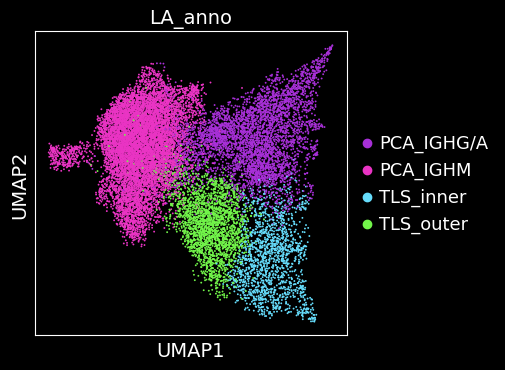

In [18]:
#plt.style.use('seaborn-v0_8-white')
plt.style.use('dark_background')
LA_bin50.obs['LA_anno']='PCA_IGHM'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['3','5','6']),'LA_anno']='PCA_IGHG/A'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['2']),'LA_anno']='TLS_outer'
LA_bin50.obs.loc[LA_bin50.obs.leiden.isin(['4']),'LA_anno']='TLS_inner'
sc.pl.umap(LA_bin50,color=['LA_anno'],palette=['#A830D8','#EA34C4','#66DDFC','#72F54A'])#,save='fig4c.png')

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
#import scvelo as scv
import anndata as ad
import omicverse as ov
import pcurvepy2

/home/fengyu/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_data.py:329: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
import omicverse as ov
print(sc.__version__)

1.11.2


In [19]:
import scanpy as sc

# 读取数据
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)
adata.obs['loc']=adata.obs['batch'].astype(str)+'_'+adata.obs['bin50_x'].astype(str)+'_'+adata.obs['bin50_y'].astype(str)

Begin robust gene identification
After filtration, 31645/32065 genes are kept.     Among 31645 genes, 25791 genes are robust.
End of robust gene identification.
Begin size normalization: pearson and HVGs selection pearson
Time to analyze data in cpu: 343.81273341178894 seconds.
End of size normalization: pearson and HVGs selection pearson
Lineages: [Lineage[2, 3, 0], Lineage[2, 3, 1]]


  0%|          | 0/1 [00:00<?, ?it/s]

Reversing from leaf to root
Averaging branch @3 with lineages: [0, 1] [<pcurvepy2.pcurve.PrincipalCurve object at 0x7b218b59c370>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7b218b59d0f0>]
Shrinking branch @3 with curves: [<pcurvepy2.pcurve.PrincipalCurve object at 0x7b218b59c370>, <pcurvepy2.pcurve.PrincipalCurve object at 0x7b218b59d0f0>]


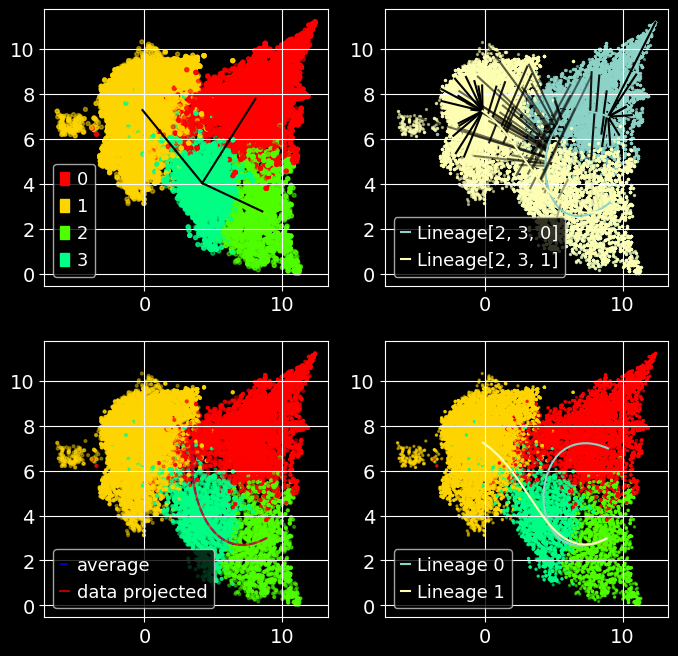

In [20]:
LA_bin50.obs[['umap_X', 'umap_Y']] = LA_bin50.obsm['X_umap']
LA_cells=adata[(adata.obs['loc'].isin(LA_bin50.obs['loc']))]
LA_cells=LA_cells[(LA_cells.obs['IGHcdr3aa'].notna())|(LA_cells.obs['IGK/Lcdr3aa'].notna())]
LA_cells.obs=LA_cells.obs.merge(LA_bin50.obs[['loc','LA_anno','umap_X','umap_Y']],on='loc')
umap_coords = np.column_stack([LA_cells.obs['umap_X'].values, LA_cells.obs['umap_Y'].values])
LA_cells.obsm['X_umap'] = umap_coords
LA_cells=ov.pp.preprocess(LA_cells,mode='pearson|pearson',n_HVGs=3000  ,)
LA_cells.raw = LA_cells
LA_cells = LA_cells[:, LA_cells.var.highly_variable_features]
ov.pp.scale(LA_cells)
ov.pp.pca(LA_cells,layer='scaled',n_pcs=50)
Traj=ov.single.TrajInfer(LA_cells,basis='X_umap',groupby='LA_anno',
                         use_rep='scaled|original|X_pca',n_comps=50)
Traj.set_origin_cells('TLS_inner')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
Traj.inference(method='slingshot',num_epochs=1,debug_axes=axes)

In [21]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_Cell_with_slingshot.h5ad')

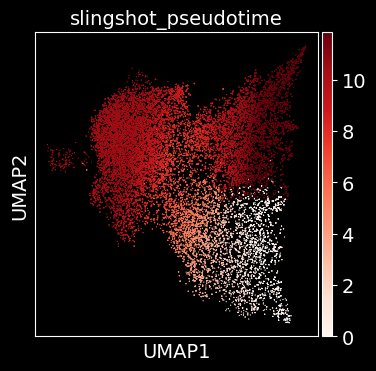

In [22]:
sc.pl.umap(adata,color = 'slingshot_pseudotime',cmap = 'Reds', save = 'Figure4J_colorbar.pdf')

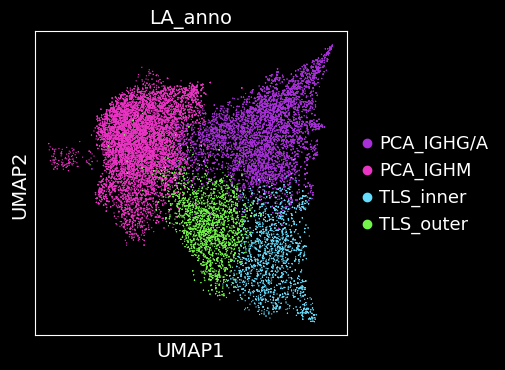

In [23]:
plt.style.use('dark_background')
sc.pl.umap(adata,color=['LA_anno'],palette=['#A830D8','#EA34C4','#66DDFC','#72F54A'], save = 'Figure4K1.pdf')

# Figure4L

In [24]:
adata1 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/02.XCR_combine_meta/D06047A2/D06047A2.meta.preprocessed.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
LA_cells = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_cells_all_gene.h5ad')
LA = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_Cell_with_slingshot.h5ad')

In [25]:
adata1.obsm['X_umap'] = adata1.obsm['spatial'] 
adata1.obs['TLScluster'] = adata2.obs['TLScluster']
adata1.obs['loc']='D06047A2_'+adata1.obs['bin50_x'].astype(str)+'_'+adata1.obs['bin50_y'].astype(str)
LA_cells.obs = LA.obs

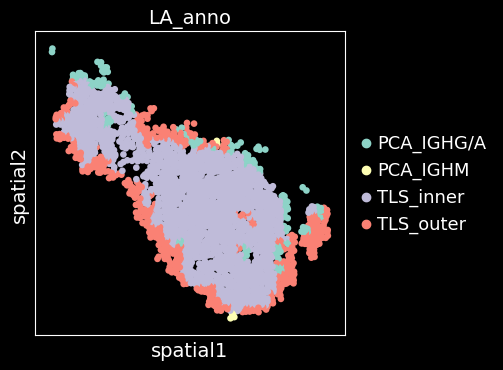

AnnData object with n_obs × n_vars = 2744 × 33139
    obs: 'dnbCount', 'area', 'id', 'orig.ident', 'x', 'y', 'cellID', 'bin50_x', 'bin50_y', 'TRAcdr3aa', 'TRBcdr3aa', 'mutation_percent', 'CSR', 'classes', 'IGK/Lcdr3aa', 'IGKorIGL', 'IGHcdr3aa', 'bin50_location_id', 'TLScluster', 'LA_anno', 'slingshot_pseudotime'
    uns: 'bin_size', 'bin_type', 'key_record', 'merged', 'resolution', 'sn', 'tissue_outline', 'LA_anno_colors'
    obsm: 'cell_border', 'spatial', 'X_umap'

In [27]:
tmp=adata1[adata1.obs['loc'].isin(LA_bin50.obs['loc'])] #取出在LAbin50里的cell
tmp.obs=tmp.obs.merge(LA_bin50.obs[['loc','LA_anno']],on='loc') # 加上LA——anno的信息
tmp=tmp[(tmp.obs['IGHcdr3aa'].notna())|(tmp.obs['IGK/Lcdr3aa'].notna())] #过滤出含有BCR对应链的细胞 # 就是B或者Plasma
tissue_outline=pd.DataFrame(adata1.uns['tissue_outline'],columns=['x','y'])
df1 = tmp
df1 = df1.obs[df1.obs['LA_anno'].isin(['TLS_inner','TLS_outer'])]
tmp.obs.index=tmp.obs.index.astype(str)
#tmp=tmp[(tmp.obs['IGHcdr3aa'].notna())]
tmp = tmp[tmp.obs['TLScluster'] == 3]
LA_cells.obs['loc']=LA_cells.obs['batch'].astype(str)+'_'+LA_cells.obs['x'].astype(str)+'_'+LA_cells.obs['y'].astype(str)
tmp.obs['loc']='D06047A2'+'_'+tmp.obs['x'].astype(str)+'_'+tmp.obs['y'].astype(str)
extra = LA_cells.obs[['loc', 'slingshot_pseudotime']].drop_duplicates('loc')
tmp.obs = tmp.obs.merge(extra, on='loc', how='left')   # 现在 tmp.obs 仍是 3495 行
# 2) 如果 loc 列只是临时用于匹配，用完可删掉
tmp.obs.drop(columns=['loc'], inplace=True)
# 3) 继续画图
sc.pl.spatial(tmp, color=['LA_anno'], spot_size=50)
LA=tmp.obs
#LA=LA[(LA['x']>12000)&(LA['x']<14500)&(LA['y']>9700)&(LA['y']<12000)]
position = tmp.obsm['spatial']
n_neigh=50
grid_num=50
smooth=0.5
density=1.0
max_distance_threshold=500
tmp

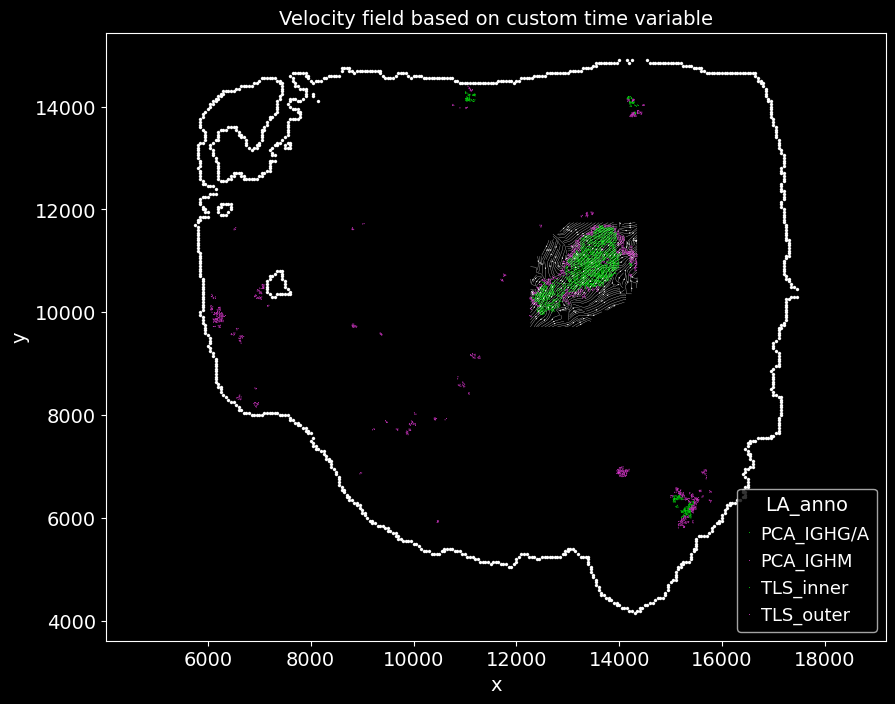

In [28]:
n_neigh= 10
grid_num= 20
smooth=0.5
density=1.0
#max_distance_threshold=500
tmp
plt.style.use('dark_background')
from scipy.sparse import csr_matrix
from scipy.interpolate import griddata
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=n_neigh).fit(position)
distances, indices = nbrs.kneighbors(position)
# Create transition matrix using nearest neighbors
indptr = [0]
idx_list = []
data_list = []

for i in range(tmp.shape[0]):  # Using cell_names to get count
    neighbors = indices[i]
    weights = 1.0 / (distances[i] + 1e-6)  # Simple distance-based weight
    weights = weights / np.sum(weights)  # Normalize
    
    idx_list.extend(neighbors)
    data_list.extend(weights)
    indptr.append(indptr[-1] + len(neighbors))

trans_neigh_csr = csr_matrix((data_list, idx_list, indptr), shape=(position.shape[0], position.shape[0]))

V = np.zeros(position.shape)
time_values = LA['slingshot_pseudotime'].values

for cell in range(position.shape[0]):
    cell_u = 0.0
    cell_v = 0.0
    x1 = position[cell][0]
    y1 = position[cell][1]
    
    for i, neigh in enumerate(indices[cell]):
        # Get transition probability
        p = trans_neigh_csr[cell, neigh]
        
        # Adjust direction based on time difference
        if time_values[neigh] < time_values[cell]:
            p = -p
            
        x2 = position[neigh][0]
        y2 = position[neigh][1]
        
        # Avoid division by zero
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if dist > 1e-6:
            sub_u = p * (x2 - x1) / dist
            sub_v = p * (y2 - y1) / dist
            cell_u += sub_u
            cell_v += sub_v
            
    # Normalize by number of neighbors
        V[cell][0] = cell_u / n_neigh if n_neigh > 0 else 0
        V[cell][1] = cell_v / n_neigh if n_neigh > 0 else 0
# Define grid
x = position[:, 0]
y = position[:, 1]
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)

xi = np.linspace(x_min, x_max, grid_num)
yi = np.linspace(y_min, y_max, grid_num)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolate velocity to grid
Ui = griddata((x, y), V[:, 0], (Xi, Yi), method='cubic', fill_value=0)
Vi = griddata((x, y), V[:, 1], (Xi, Yi), method='cubic', fill_value=0)
if smooth > 0:
    from scipy.ndimage import gaussian_filter
    Ui = gaussian_filter(Ui, sigma=smooth)
    Vi = gaussian_filter(Vi, sigma=smooth)

# Scale for visualization
if density != 1.0:
    Ui = Ui * density
    Vi = Vi * density

P_grid = (Xi, Yi)
V_grid = (Ui, Vi)
plt.figure(figsize=(10, 8))
#plt.scatter(data.position[:, 0], data.position[:, 1], c=data.cells['time'].values, 
#            cmap='inferno', s=5, alpha=0.7)
sns.scatterplot(data=tissue_outline,x='x',y='y',color='white',s=5)
#sns.scatterplot(data=edge_coordinates_x50,x='X',y='Y',color='white',s=5)
#sns.scatterplot(data=tmp[tmp.obs['bin50 structural annotation'].isin(['LA-TLS','LA=PCA'])].obs,x='x',y='y',hue='time',s=1,palette='inferno')
#sns.scatterplot(data=LA[LA['LA_anno'].isin(['TLS_inner','TLS_outer'])],x='x',y='y',hue='LA_anno',palette=['#05FF11','#FF42F0'],s=0.1,edgecolor=None)
#sns.scatterplot(data=LA,x='x',y='y',hue='LA_anno',palette=['#702C9F','#E93323','#93D150','#4FB0F0'],s=1,edgecolor=None)
sns.scatterplot(data=df1,x='x',y='y',hue='LA_anno',palette=['#05FF11','#FF42F0'],s=0.4,edgecolor=None)
plt.streamplot(P_grid[0], P_grid[1], V_grid[0], V_grid[1], density=2, color='white', linewidth=0.2,arrowsize=0.2)
#plt.colorbar(label='Pseudotime')
plt.axis('equal')
plt.title('Velocity field based on custom time variable')
plt.grid(False)
#plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),mar3kerscale=10)
#plt.savefig('fig4i1_overview.png', dpi=600, bbox_inches='tight')
plt.show()

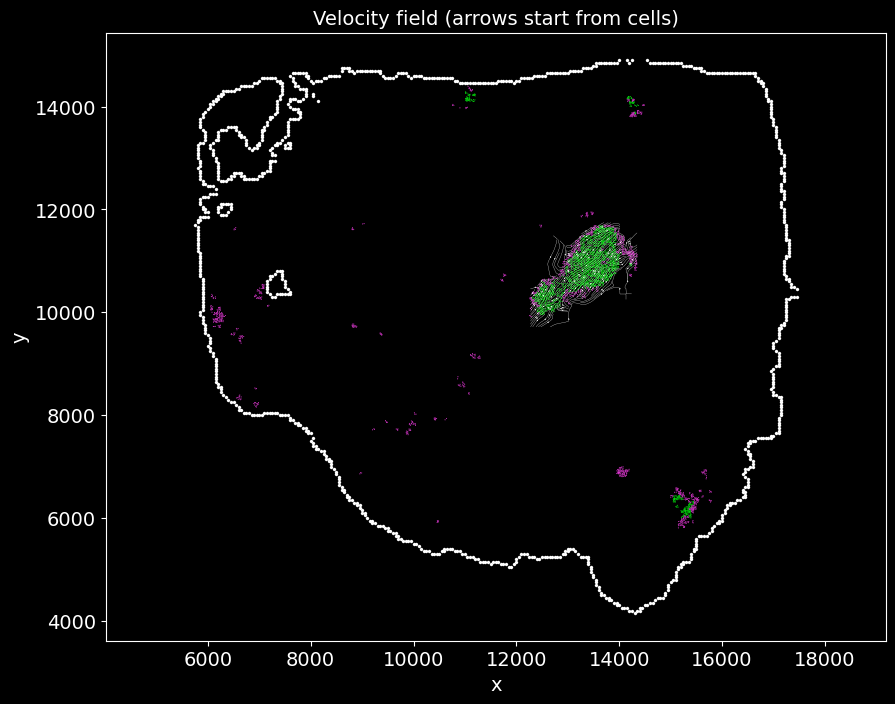

In [29]:
# -------------------------------------------------
# 1. 把细胞坐标作为 streamplot 的起点
# -------------------------------------------------
start_points = position[:, :2]    # shape=(n_cell, 2)

# -------------------------------------------------
# 2. 重新绘制
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 8))

# 组织轮廓 & 细胞散点（保持你原来的风格）
sns.scatterplot(data=tissue_outline, x='x', y='y', color='white', s=5, ax=ax,legend = False)
sns.scatterplot(data=df1, x='x', y='y', hue='LA_anno',
                palette=['#05FF11','#FF42F0'], s=0.4, edgecolor=None, ax=ax,legend = False)

# 画流线，关键就在 start_points
ax.streamplot(P_grid[0], P_grid[1],
              V_grid[0], V_grid[1],
              start_points=start_points,  # <<<<<< 让箭头从细胞开始
              density=2.5,                  # 不再随机撒点，density 此时只控制“线”的多少
              color='white',
              linewidth=0.2,
              arrowsize=0.2)

ax.axis('equal')
ax.set_title('Velocity field (arrows start from cells)')
ax.grid(False)
plt.savefig('fig4i1_zoomin.png', dpi=2500, bbox_inches='tight')
#plt.savefig('fig4i1_start_from_cells.png', dpi=600, bbox_inches='tight')
plt.show()

# Figure4M

In [30]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/script_for_github/Figure4-ok_7.23/test/新增分析8.1_PPT/LA_cells_all_gene.h5ad')
csv = pd.read_csv('/data1/fengyu/methods/LA_cells.csv')

In [31]:
adata.obs.index = adata.obs.index.astype(str)
csv.index = csv.index.astype(str)
adata.obs['time'] = csv['slingshot_pseudotime']

In [32]:
# 读取数据
adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')

In [34]:
tmp=adata[adata.obs['batch']=='D06047A2']
tmp.obs = tmp.obs.reset_index()
tmp = tmp.obs[tmp.obs['LA_anno'].notna()]
mask = tmp['LA_anno'].isin(['PCA_IGHG/A', 'PCA_IGHM', 'TLS_outer', 'TLS_inner'])
sub = tmp.loc[mask]

clones_in_all = (
    sub.groupby('clone_family_id')['LA_anno']
       .nunique()
       .eq(4)          # 恰好 4 个不同区域
       .pipe(lambda s: s[s].index)
)
print(clones_in_all.tolist())
clones = clones_in_all.tolist()
count_series = (tmp['clone_family_id']
                .value_counts()
                .reindex(clones, fill_value=0)
                .astype(int))

[109.0, 146.0, 164.0, 306.0, 400.0, 411.0, 514.0, 743.0, 785.0, 813.0, 905.0, 928.0, 929.0, 989.0, 1092.0, 1096.0, 1150.0, 1172.0, 1215.0, 1335.0, 1358.0, 1362.0, 1364.0, 1429.0, 1554.0, 1555.0, 1622.0, 1706.0, 1771.0, 1791.0, 1865.0, 1884.0, 1897.0, 2088.0, 2100.0, 2105.0, 2125.0, 2135.0, 2251.0, 2278.0, 2285.0, 2349.0, 2359.0, 2364.0, 2398.0, 2472.0, 2717.0, 2835.0, 2880.0, 2902.0, 3037.0, 3042.0, 3070.0, 3098.0, 3125.0, 3337.0, 3425.0, 3438.0, 3444.0]


In [35]:
count_series_sorted = count_series.sort_values()
tmp1 = tmp[tmp['clone_family_id'] == 411]
tissue_outline=pd.DataFrame(adata1.uns['tissue_outline'],columns=['x','y'])
tmp1 = tmp1.reset_index()
TLS_inner_list = tmp1[tmp1['LA_anno'] == 'TLS_inner'].index.tolist()
TLS_outer_list = tmp1[tmp1['LA_anno'] == 'TLS_outer'].index.tolist()
PCA_IGHGA_list = tmp1[tmp1['LA_anno'] == 'PCA_IGHG/A'].index.tolist()
PCA_IGHM_list = tmp1[tmp1['LA_anno'] == 'PCA_IGHM'].index.tolist()

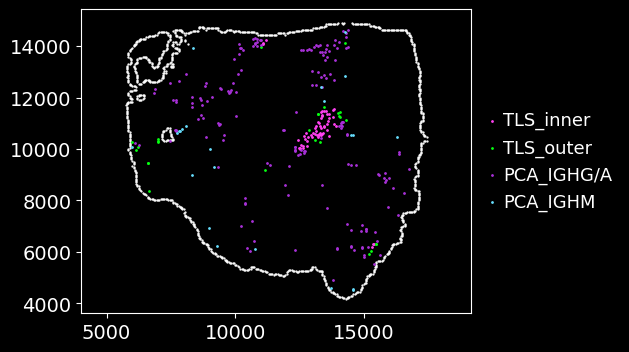

In [37]:
fig, ax = plt.subplots(figsize=(5, 4))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.tick_params(colors='white')

for spine in ax.spines.values():
    spine.set_color('white')

# 绘制散点图
plt.scatter(tissue_outline['x'], tissue_outline['y'], color='white', s=0.4, label=None)

plt.scatter(tmp1[tmp1['LA_anno'] == 'TLS_inner']['x'],
            tmp1[tmp1['LA_anno'] == 'TLS_inner']['y'],
            s=1, color='#FF42F0',  label='TLS_inner')

plt.scatter(tmp1[tmp1['LA_anno'] == 'TLS_outer']['x'],
            tmp1[tmp1['LA_anno'] == 'TLS_outer']['y'],
            s=1, color='#05FF11', label='TLS_outer')

plt.scatter(tmp1[tmp1['LA_anno'] == 'PCA_IGHG/A']['x'],
            tmp1[tmp1['LA_anno'] == 'PCA_IGHG/A']['y'],
            s=1, color='#A830D8',  label='PCA_IGHG/A')

plt.scatter(tmp1[tmp1['LA_anno'] == 'PCA_IGHM']['x'],
            tmp1[tmp1['LA_anno'] == 'PCA_IGHM']['y'],
            s=1, color='#66DDFC', label='PCA_IGHM')

# 设置图例在右侧，文字为白色
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
for text in legend.get_texts():
    text.set_color('white')

plt.grid(False)
plt.axis('equal')
plt.savefig('Figure4M——overview.png',dpi = 600,bbox_inches='tight')

In [38]:
array_2d = adata1.obsm['cell_border'].reshape(-1, adata1.obsm['cell_border'].shape[-1])

df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID']=df['cellID'].astype(str)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df_filtered = df[(df['x'] != 32767) & (df['y'] != 32767)]
adata1.obs['cellID'] = adata1.obs['cellID'].astype(str)
df_filtered = pd.merge(df_filtered, adata1.obs[['x','y','cellID']], on='cellID', how='left')
df_filtered['x']=df_filtered['x_x']+df_filtered['x_y']
df_filtered['y']=df_filtered['y_x']+df_filtered['y_y']
df_cellborder=df_filtered[['cellID','x','y']]

In [40]:
tmp1 = tmp[tmp['clone_family_id'] == 411]
data_GA= tmp1.copy()
data_GA['cellID'] = data_GA['cellID'].astype(int)
cell_list1 = data_GA['cellID'].tolist()
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
cell_border1 = df_cellborder[df_cellborder['cellID'].isin(cell_list1)]
cell_border_list1 = cell_border1.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
filtered_cell_borders_list1 = cell_border_list1
filtered_cell_borders_list1 = [np.array(cell) for cell in filtered_cell_borders_list1]
filtered_cell_borders_list1[0]

array([[13742,  4561],
       [13731,  4571],
       [13726,  4583],
       [13735,  4592],
       [13744,  4606],
       [13753,  4606],
       [13761,  4593],
       [13759,  4589],
       [13759,  4579]])

In [41]:
time_list = tmp1['time'].tolist()

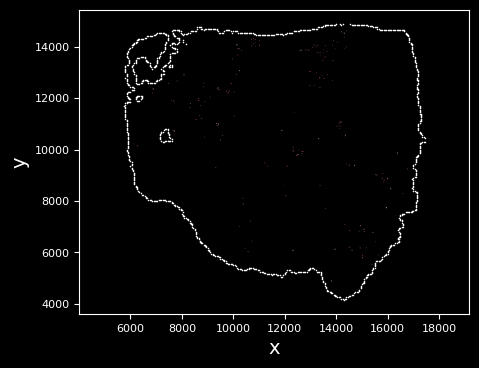

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from scipy.interpolate import splprep, splev
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection
from scipy.interpolate import splprep, splev
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize


fig,ax = plt.subplots(figsize = (5,4))   
BG_COLOR = 'black'     # 画布底色
TXT_COLOR = 'white'    # 文字颜色
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)
ax.tick_params(colors=TXT_COLOR, labelsize=8)
for spine in ax.spines.values():
    spine.set_color(TXT_COLOR)

def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))
    
cmap = cm.get_cmap('PiYG_r')     
norm = Normalize(vmin=1,
                 vmax=10)

patches = []
for i, cell_boundary in enumerate(filtered_cell_borders_list1):
    if i in PCA_IGHGA_list:
        smooth = smooth_boundary(cell_boundary, 0.8)
        codes = [Path.LINETO] * len(smooth)
        codes[0] = Path.MOVETO
        codes[-1] = Path.CLOSEPOLY

        # 用 time 映射颜色
        color = cmap(norm(time_list[i]))
        patches.append(PathPatch(Path(smooth, codes),
                             edgecolor= TXT_COLOR ,
                             facecolor=color,
                             lw=0.05, antialiased=True))

ax.add_collection(PatchCollection(patches, match_original=True))
'''
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])                       # 必须设置空数组
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.02)
cbar.set_label('Time', color=TXT_COLOR, labelpad=3)
cbar.ax.tick_params(colors=TXT_COLOR, labelsize=7)
cbar.outline.set_color(TXT_COLOR)      # 颜色条边框
'''
sns.scatterplot(data=tissue_outline, x='x', y='y',
                color=TXT_COLOR , s=1, edgecolor=None)
#sns.kdeplot(data=df1[df1['TRBcdr3aa'].isin(ls)], x='x', y='y', fill=False, cmap='Reds', bw_adjust=0.2,thresh=0.5, kernel='linear',cut=0.2,alpha=0.7)

plt.grid(False)
plt.axis('equal')
plt.savefig('test_only_use_this_colorbar.pdf',
            dpi=2500,               # 2500 太大，600 已足够
            bbox_inches='tight',
            facecolor=BG_COLOR,
            edgecolor='none')
plt.show()

In [43]:
count_series_sorted

clone_family_id
1358.0      6
2100.0      7
1622.0      7
1555.0      7
1554.0      7
743.0       7
1215.0      7
3037.0      8
2359.0      8
3070.0      9
2717.0      9
2472.0      9
146.0      10
813.0      10
2088.0     10
1335.0     11
1791.0     11
3425.0     11
1362.0     13
1706.0     14
1865.0     16
1429.0     17
2835.0     17
514.0      18
1771.0     18
1172.0     19
785.0      20
2278.0     21
3438.0     21
3444.0     22
929.0      24
400.0      26
2105.0     28
928.0      29
989.0      32
1364.0     33
3337.0     34
2285.0     34
2349.0     35
3042.0     36
2880.0     36
3125.0     39
2398.0     40
2125.0     42
1092.0     44
905.0      47
2902.0     50
109.0      57
1150.0     60
164.0      68
2251.0     73
306.0      80
2135.0     81
1897.0     85
1096.0     91
3098.0    251
1884.0    289
411.0     290
2364.0    456
Name: count, dtype: int64

In [44]:
heat_family_list = [2364,411,1884,3098,1096,1897,2135,306,2251,164]

In [45]:
top10_family_info = adata[adata.obs['batch']=='D06047A2']

In [46]:
top10_family_info =  top10_family_info.obs[top10_family_info.obs['clone_family_id'].isin(heat_family_list)]

In [47]:
top10_family_info = top10_family_info[top10_family_info['LA_anno'].notna()]

In [48]:
df = top10_family_info.copy()

In [49]:
anno = ['PCA_IGHG/A','PCA_IGHM','TLS_inner','TLS_outer']

In [50]:
tmp=adata[adata.obs['batch']=='D06047A2']

In [51]:
index = tmp.obs.clone_family_id.value_counts().head(10).index.astype(int).tolist()

In [52]:
sc.pp.normalize_total(tmp, target_sum=1e4)
sc.pp.log1p(tmp)

2364


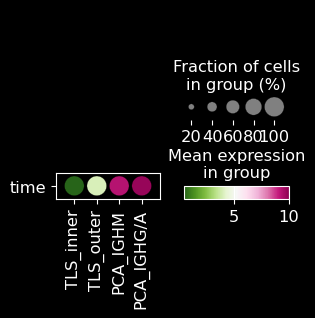

411


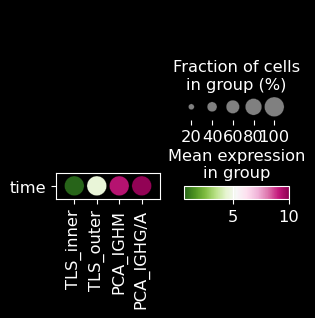

1884


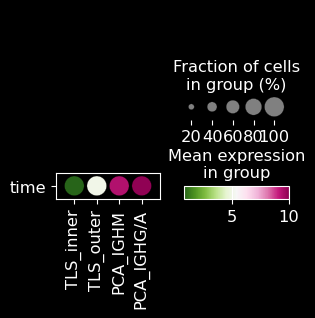

3098


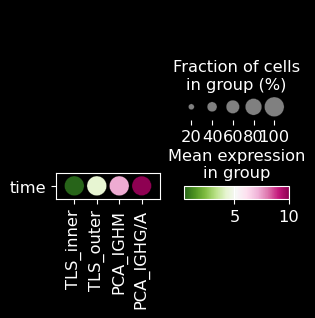

1096


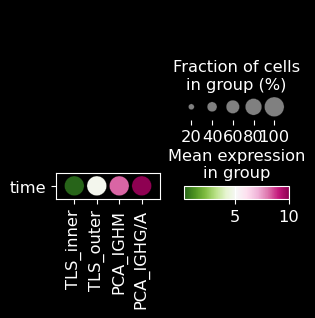

1897


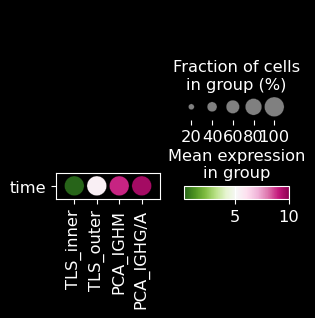

2135


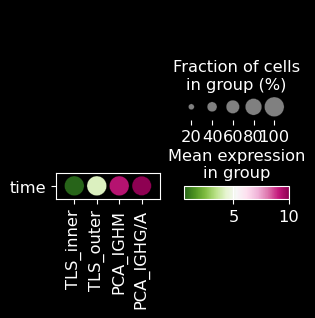

306


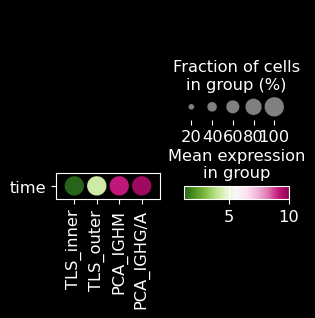

2251


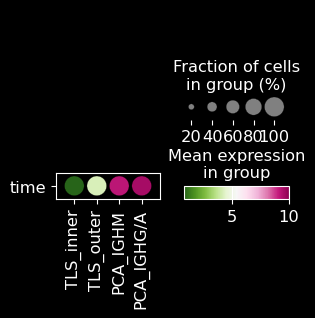

164


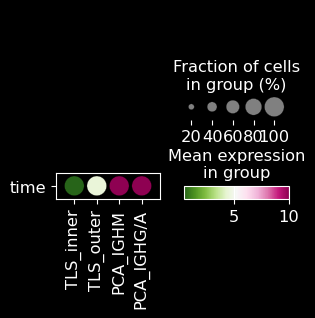

In [53]:
for i in index:
    print(i)
    df = tmp[tmp.obs['clone_family_id'] == i]
    tmp = tmp[tmp.obs['LA_anno'].notna()]
    df = df[df.obs['LA_anno'].notna()]
    # 假设 order 是你想要的顺序列表
    order = ['TLS_inner','TLS_outer','PCA_IGHM','PCA_IGHG/A']
    
    # 设置分类顺序
    df.obs['LA_anno'] = df.obs['LA_anno'].astype('category')
    df.obs['LA_anno'] = df.obs['LA_anno'].cat.set_categories(order)
    
    # 然后再绘图
    sc.pl.dotplot(df, var_names='time', groupby='LA_anno',swap_axes=True,vmax = 10,cmap='PiYG_r',save = f'family{i}.pdf')
        